# **PROJEK SIM** (Analisis Data Netflix Movies and TV Shows)

### Import library yang di butuhkan

Langkah pertama adalah mengimpor semua pustaka (library) yang diperlukan untuk analisis data dan visualisasi.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data wrangling adalah proses penting untuk membersihkan dan menyiapkan data mentah agar siap dianalisis. Proses ini terdiri dari tiga tahap: Gathering (mengumpulkan data), Assessing (menilai kualitas data untuk menemukan masalah), dan Cleaning (membersihkan masalah yang ada).

### Gathering Data

Pada proyek ini, data yang digunakan merupakan data open-source yang tersedia di kaggle. Dataset yang digunakan adalah Netflix Movies and TV Shows, yang berisi informasi tentang judul, sutradara, negara, tahun rilis, dan atribut lainnya dari konten yang tersedia di Netflix.

In [6]:
# Memuat tabel Netflix
netflix_data = pd.read_csv("netflix_titles.csv")

# Menampilkan 5 baris pertama dari data
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Assessing Data

Di tahap kedua, kita akan menilai data untuk mengidentifikasi potensi masalah seperti tipe data yang salah, nilai yang hilang (missing values), atau data duplikat.

#### Menilai tabel netflix_data

1. Memeriksa tipe data dari setiap kolom dan jumlah data non-null

In [7]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Insight:

- Kolom date_added masih bertipe object, seharusnya datetime.
- Terdapat missing values di kolom director, cast, country, date_added, dan rating.

#### 2. Memeriksa jumlah missing value secara eksplisit.

In [8]:
netflix_data.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Kolom director, cast, dan country memiliki banyak nilai yang hilang. Kolom date_added dan rating memiliki sedikit nilai yang hilang.

#### 3. Memeriksa duplikasi data.

In [9]:
print("Jumlah duplikasi: ", netflix_data.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplikat pada dataset ini.

#### 4. Memeriksa parameter statistik

In [10]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Statistik untuk release_year tampak wajar, menunjukkan konten dari tahun 1925 hingga 2021.

### Cleaning Data

Pada tahap Ketiga, kita akan memperbaiki masalah yang ditemukan pada tahap assessing.

#### Membersihkan tabel netflix_data

- Untuk kolom director, cast, dan country yang memiliki banyak nilai kosong, kita akan mengisinya dengan nilai "Unknown" agar tidak mengganggu analisis.
- Untuk date_added dan rating yang hanya memiliki sedikit nilai kosong, kita akan menghapus baris tersebut karena tidak akan signifikan memengaruhi keseluruhan data.

##### 1. Menangani missing values

In [11]:
# Mengisi nilai kosong untuk kolom dengan banyak missing value
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# Menghapus baris dengan nilai kosong di kolom yang jumlahnya sedikit
# (date_added, rating, dan sekarang termasuk duration)
netflix_data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

# Memeriksa kembali untuk memastikan semua missing values sudah ditangani
print("Pengecekan missing values setelah perbaikan:")
print(netflix_data.isna().sum())

Pengecekan missing values setelah perbaikan:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<ipython-input-11-2063182930>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['director'].fillna('Unknown', inplace=True)
<ipython-input-11-2063182930>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

##### 2. Mengubah tipe data untuk kolom date_added

Mengubah tipe data menjadi datetime untuk analisis berbasis waktu. Kita tambahkan .str.strip() untuk menghapus spasi ekstra.

In [12]:
# Menghapus spasi di awal dan akhir dari string tanggal
netflix_data['date_added'] = netflix_data['date_added'].str.strip()

# Mengonversi ke tipe data datetime
netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"])
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


##### 3. Membuat kolom baru untuk analisis

Kita akan membuat kolom year_added untuk mempermudah analisis tren penambahan konten per tahun

In [13]:
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


##### 4. Memisahkan dan Membersihkan Kolom duration

Kita akan membuat dua kolom baru (duration_minutes dan duration_seasons) lalu menghapus kolom duration yang asli.

In [14]:
# Membuat dua kolom baru dengan nilai awal NaN (Not a Number)
netflix_data['duration_minutes'] = np.nan
netflix_data['duration_seasons'] = np.nan

# Mengisi data ke kolom baru berdasarkan tipe konten
# .loc digunakan untuk memastikan kita mengubah DataFrame asli
for index, row in netflix_data.iterrows():
    if row['type'] == 'Movie':
        # Mengambil angka dari string seperti "90 min"
        netflix_data.loc[index, 'duration_minutes'] = int(row['duration'].split(' ')[0])
    elif row['type'] == 'TV Show':
        # Mengambil angka dari string seperti "1 Season" atau "3 Seasons"
        netflix_data.loc[index, 'duration_seasons'] = int(row['duration'].split(' ')[0])

# Mengisi nilai NaN yang tersisa di kolom baru dengan 0
netflix_data['duration_minutes'].fillna(0, inplace=True)
netflix_data['duration_seasons'].fillna(0, inplace=True)

# Mengubah tipe data kolom baru menjadi integer
netflix_data['duration_minutes'] = netflix_data['duration_minutes'].astype(int)
netflix_data['duration_seasons'] = netflix_data['duration_seasons'].astype(int)

# Menghapus kolom 'duration' yang asli karena sudah tidak diperlukan
netflix_data.drop('duration', axis=1, inplace=True)

# Menampilkan 5 baris pertama untuk verifikasi
print("Data setelah memisahkan dan membersihkan kolom 'duration':")
netflix_data.head()

Data setelah memisahkan dan membersihkan kolom 'duration':


<ipython-input-14-1739388752>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['duration_minutes'].fillna(0, inplace=True)
<ipython-input-14-1739388752>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year_added,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,0,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,0,2


## Exploratory Data Analysis (EDA)

Kita akan melakukan eksplorasi untuk menemukan pola dan wawasan dari data yang sudah bersih dengan menjalankan kode di bawah ini.

### Explore netflix_data

Analisis untuk Menjawab Pertanyaan:

1. Distribusi Tipe Konten:

In [16]:
type_counts = netflix_data['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


2. 10 Negara Produsen Teratas:
(Mengambil negara pertama jika ada beberapa negara dalam satu entri)

In [17]:
top_countries = netflix_data['country'].str.split(', ').str[0].value_counts().head(10)
print(top_countries)

country
United States     3201
India             1008
Unknown            829
United Kingdom     625
Canada             271
Japan              257
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64


3. Tren Penambahan Konten per Tahun:

In [18]:
yearly_content_counts = netflix_data['year_added'].value_counts().sort_index()
print(yearly_content_counts)

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


4. 10 Genre Paling Umum:
(Memisahkan genre yang digabungkan dalam satu string)

In [19]:
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts().head(10)
print(genre_counts)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


5. Distribusi Rating Usia:

In [20]:
rating_counts = netflix_data['rating'].value_counts().head(10)
print(rating_counts)

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana proporsi Film vs. Acara TV? 🎞️

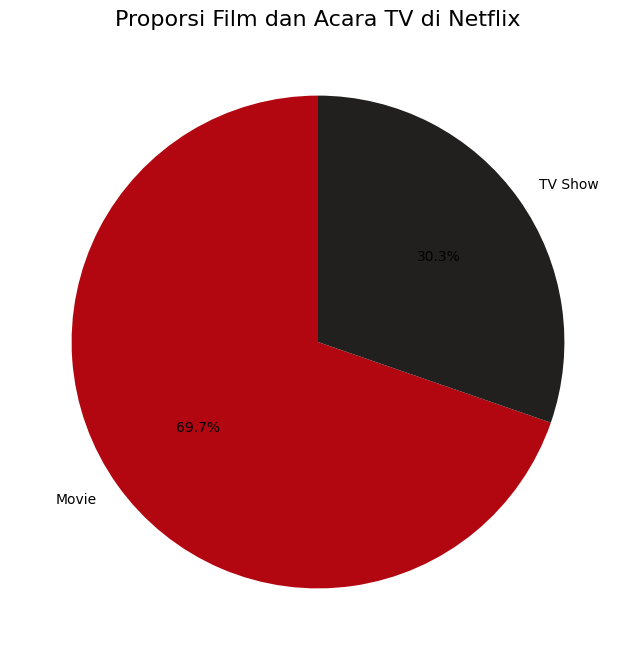

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    colors=['#B20710', '#221F1F'],
    startangle=90
)
plt.title('Proporsi Film dan Acara TV di Netflix', fontsize=16)
plt.show()

Katalog Netflix secara signifikan didominasi oleh Film (Movies), yang mencakup sekitar 69.7% dari total konten. Acara TV (TV Shows) mengisi sisa 30.3%. Ini menunjukkan bahwa strategi akuisisi konten Netflix lebih berfokus pada film.

### Pertanyaan 2: Negara mana yang menjadi produsen konten terbanyak? 🌍

<ipython-input-22-3574012588>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')


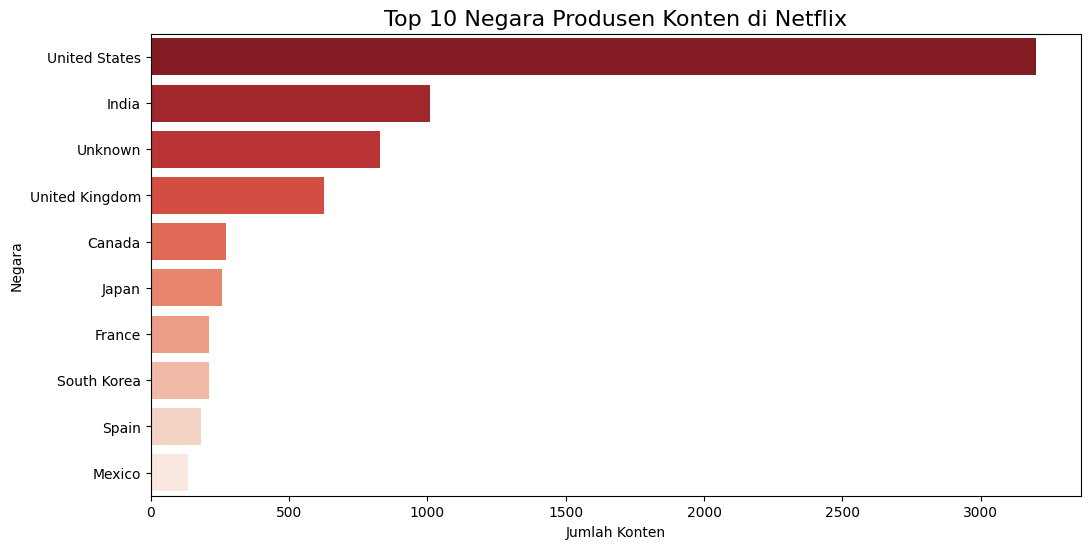

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')
plt.title('Top 10 Negara Produsen Konten di Netflix', fontsize=16)
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')
plt.show()

Amerika Serikat adalah produsen konten terbesar di Netflix, jauh mengungguli negara-negara lain. India menempati posisi kedua, yang mencerminkan pentingnya pasar Bollywood. Negara-negara seperti Inggris, Jepang, dan Korea Selatan juga merupakan kontributor utama, menunjukkan diversifikasi konten Netflix untuk melayani audiens global

### Pertanyaan 3: Bagaimana tren penambahan konten dari tahun ke tahun? 📈

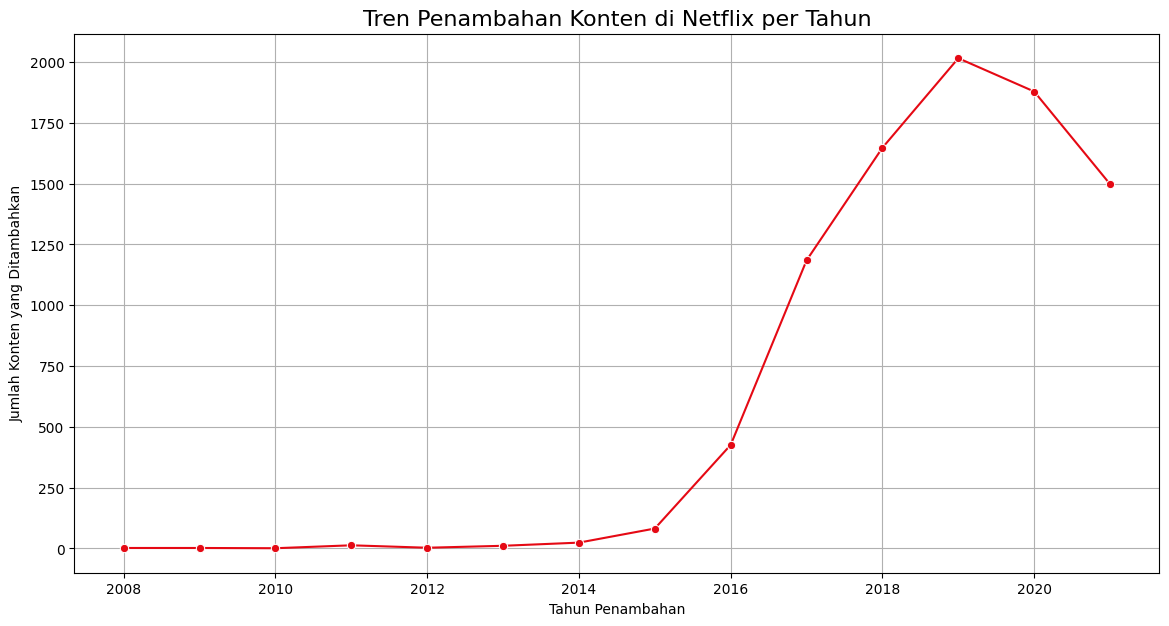

In [23]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_content_counts.index, y=yearly_content_counts.values, marker='o', color='#E50914')
plt.title('Tren Penambahan Konten di Netflix per Tahun', fontsize=16)
plt.xlabel('Tahun Penambahan')
plt.ylabel('Jumlah Konten yang Ditambahkan')
plt.grid(True)
plt.show()

Grafik menunjukkan pertumbuhan eksponensial dalam penambahan konten, terutama antara tahun 2016 dan 2019. Puncak penambahan konten terjadi pada tahun 2019. Setelah itu, terjadi sedikit penurunan pada tahun 2020 dan 2021, yang kemungkinan disebabkan oleh perlambatan produksi akibat pandemi global atau pergeseran strategi konten perusahaan.

### Pertanyaan 4: Apa saja genre yang paling umum di Netflix? 🎭

<ipython-input-24-3351932483>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='dark:salmon_r')


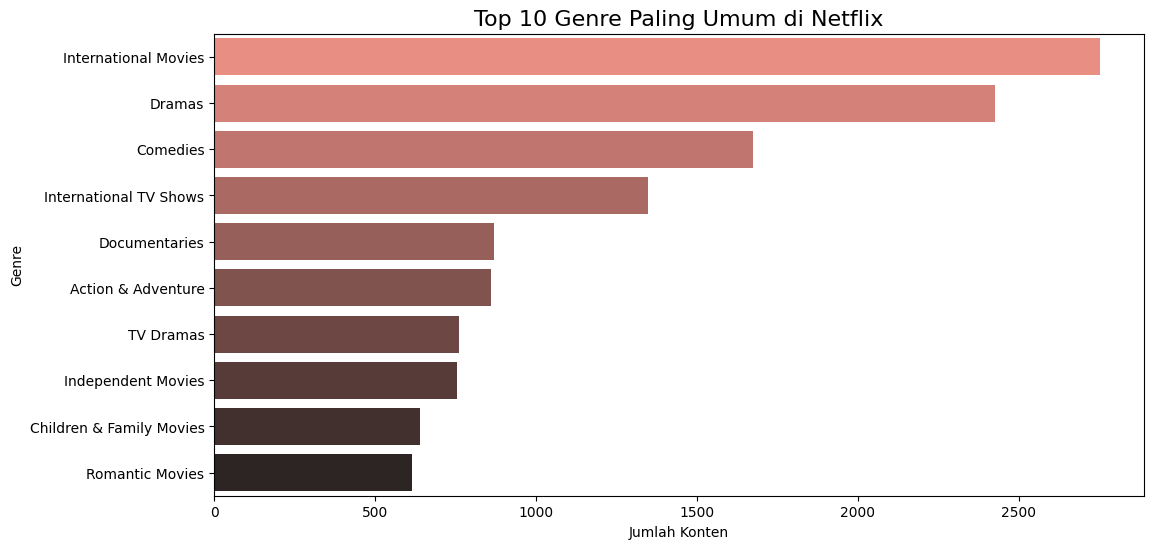

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='dark:salmon_r')
plt.title('Top 10 Genre Paling Umum di Netflix', fontsize=16)
plt.xlabel('Jumlah Konten')
plt.ylabel('Genre')
plt.show()

International Movies dan Dramas adalah dua kategori genre yang paling banyak ditemukan di Netflix, menandakan fokus platform pada konten yang dapat menjangkau audiens global. Comedies juga sangat populer. Kehadiran "International" sebagai kategori teratas menegaskan strategi ekspansi global Netflix.

### Pertanyaan 5: Bagaimana distribusi rating usia pada konten Netflix? 🔞

<ipython-input-25-1821315399>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Greys_r')


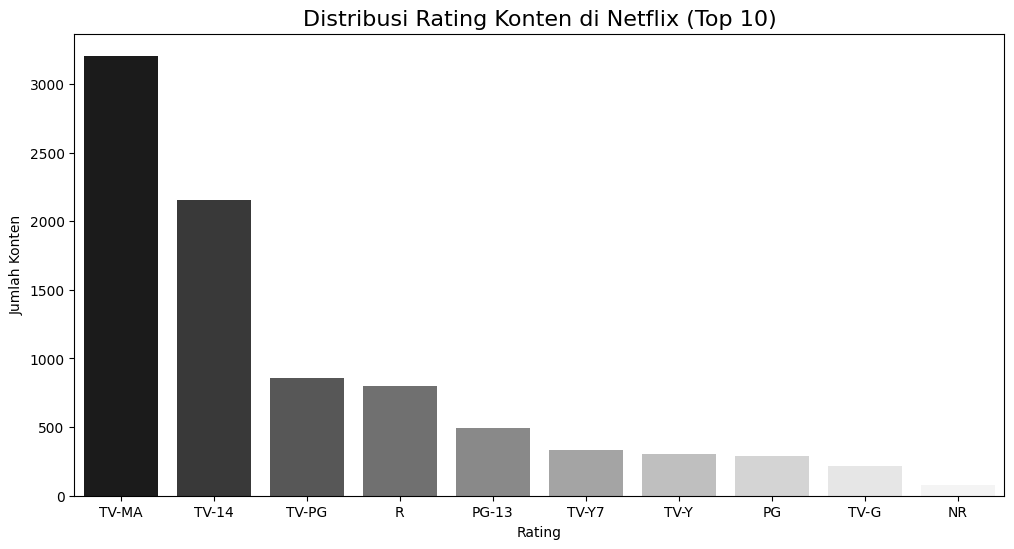

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Greys_r')
plt.title('Distribusi Rating Konten di Netflix (Top 10)', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Jumlah Konten')
plt.show()

Konten dengan rating TV-MA (untuk penonton dewasa) menjadi yang paling dominan, diikuti oleh TV-14 (untuk remaja di atas 14 tahun). Ini menunjukkan bahwa target audiens utama Netflix adalah demografi dewasa dan remaja. Konten untuk anak-anak (seperti TV-Y dan TV-G) juga tersedia dalam jumlah yang signifikan, tetapi tidak sebanyak konten untuk audiens yang lebih tua.

## Conclusion

- Conclussion Pertanyaan 1: Katalog Netflix lebih banyak berisi film dibandingkan acara TV, dengan rasio sekitar 70:30. Ini menunjukkan strategi konten yang lebih memprioritaskan film.
- Conclussion Pertanyaan 2: Amerika Serikat adalah produsen konten dominan, yang menandakan pentingnya pasar Amerika bagi Netflix. Namun, investasi pada konten dari negara seperti India, Inggris, dan Jepang menunjukkan adanya upaya diversifikasi untuk melayani pasar global.
- Conclussion Pertanyaan 3: Pertumbuhan penambahan konten Netflix sangat pesat hingga mencapai puncaknya pada tahun 2019. Perlambatan setelahnya kemungkinan besar merupakan dampak dari faktor eksternal seperti pandemi global.
- Conclussion Pertanyaan 4: Genre drama dan konten internasional adalah tulang punggung dari katalog Netflix. Ini sejalan dengan strategi perusahaan untuk menghasilkan konten yang relevan secara emosional dan dapat dinikmati oleh berbagai budaya.
- Conclussion Pertanyaan 5: Netflix secara dominan menargetkan audiens dewasa dan remaja, seperti yang ditunjukkan oleh banyaknya konten dengan rating TV-MA dan TV-14. Ini mencerminkan fokus platform pada demografi yang memiliki daya beli dan waktu luang untuk berlangganan layanan streaming.

In [26]:
# Menyimpan DataFrame yang sudah bersih ke file CSV baru
netflix_data.to_csv("netflix_cleaned.csv", index=False)

print("Dataset yang sudah bersih berhasil disimpan sebagai 'netflix_cleaned.csv'")

Dataset yang sudah bersih berhasil disimpan sebagai 'netflix_cleaned.csv'
